# 1.	Reporte detallado de missing data para todas las columnas. 

# 2.	Para cada columna especificar qué tipo de modelo se utilizará (solo el nombre y el porqué) y qué valores se le darán a todos los missing values. (Ej. Imputación sectorizada por la moda, bins, y cualquier otro método visto anteriormente). 

# 3.	Reporte de qué filas están completas 

# 4.	Utilizar los siguientes métodos para cada columna que contiene missing values

1. Limpieza de los Missing Values

In [1]:
import numpy as np
import pandas as pd

In [118]:
data = pd.read_csv('titanic_MD.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",?,38.0,1.0,0.0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,NaN,1.0,NaN,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,NaN,0.0,113783,26.5500,C103,S


Cambiar los vacios, los ? por NaN

In [119]:
 # Cambiar los ? por NaN
cols = []
val = []
for col in data.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(data[col].str.contains(r'\b\0\b').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,Name,0
1,Sex,0
2,Ticket,0
3,Cabin,0
4,Embarked,0


In [120]:
# cambia los ? y espacios vacios
data.replace(r'\?', np.nan, regex = True, inplace = True)

In [121]:
data.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex            51
Age            25
SibSp           3
Parch          12
Ticket          0
Fare            8
Cabin           0
Embarked       12
dtype: int64

In [122]:
# Aproximar la edad para dejarlo en enteros
data['Age'] = round(data['Age'])

In [123]:
# tener todo en dos decimales
data['Fare'] = round(data['Fare'], 2)

In [124]:
# Ver el % de missing values en las columnas. 
pct = pd.DataFrame(data.isna().sum()/data.shape[0], columns = ['pct']).reset_index()
pct

,index,pct
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.278689
5,Age,0.136612
6,SibSp,0.016393
7,Parch,0.065574
8,Ticket,0.000000
9,Fare,0.043716


In [ ]:
# Sólo el sex y la age sobrepasan el 10%, pero considero que no es necesario eliminarlas. 

# Imputaciones

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Sex:

In [11]:
data_imputaciones = pd.DataFrame(imp_mode.fit_transform(data[['Sex']]), columns = ['Sex_mode'])

Age:

In [12]:
data_imputaciones['Age_mean'] = imp_mean.fit_transform(data[['Age']])
data_imputaciones['Age_mean'] = round(data_imputaciones['Age_mean'], 2)

In [13]:
data_imputaciones['Age_mode'] = imp_mode.fit_transform(data[['Age']])

In [14]:
data_imputaciones['Age_median'] = imp_median.fit_transform(data[['Age']])

SibSp

In [15]:
data_imputaciones['SibSp_mean'] = imp_mean.fit_transform(data[['SibSp']])
data_imputaciones['SibSp_mean'] = round(data_imputaciones['SibSp_mean'])

In [16]:
data_imputaciones['SibSp_mode'] = imp_mode.fit_transform(data[['SibSp']])
data_imputaciones['SibSp_mode'] = round(data_imputaciones['SibSp_mode'])

In [17]:
data_imputaciones['SibSp_median'] = imp_median.fit_transform(data[['SibSp']])
data_imputaciones['SibSp_median'] = round(data_imputaciones['SibSp_median'])

Parch

In [18]:
data_imputaciones['Parch_mean'] = imp_mean.fit_transform(data[['Parch']])
data_imputaciones['Parch_mean'] = round(data_imputaciones['Parch_mean'])

In [19]:
data_imputaciones['Parch_mode'] = imp_mode.fit_transform(data[['Parch']])
data_imputaciones['Parch_mode'] = round(data_imputaciones['Parch_mode'])

In [20]:
data_imputaciones['Parch_median'] = imp_median.fit_transform(data[['Parch']])
data_imputaciones['Parch_median'] = round(data_imputaciones['Parch_median'])

Fare

In [21]:
data_imputaciones['Fare_mean'] = imp_mean.fit_transform(data[['Fare']])
data_imputaciones['Fare_mean'] = round(data_imputaciones['Fare_mean'], 2)

In [22]:
data_imputaciones['Fare_mode'] = imp_mode.fit_transform(data[['Fare']])

In [23]:
data_imputaciones['Fare_median'] = imp_median.fit_transform(data[['Fare']])

Embarked

In [24]:
data_imputaciones['Embarked_mode'] = imp_mode.fit_transform(data[['Embarked']])

In [125]:
data_imputaciones

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,Fare_mean,Fare_mode,Fare_median,Embarked_mode,age_lm,SibSp_lm,Parch_lm,Fare_lm
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,71.28,71.28,71.28,C,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,53.10,53.10,53.10,S,39.0,1.0,0.0,73.27
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,51.86,51.86,51.86,S,45.0,0.0,0.0,46.76
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,16.70,16.70,16.70,S,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,26.55,26.55,26.55,S,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,female,47.00,47.0,47.0,1.0,1.0,1.0,1.0,1.0,1.0,78.96,26.55,56.93,S,NaN,NaN,NaN,NaN
179,male,35.69,24.0,35.5,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00,S,NaN,NaN,NaN,NaN
180,female,56.00,56.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,83.16,83.16,83.16,S,NaN,NaN,NaN,NaN
181,male,19.00,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,30.00,30.00,30.00,S,NaN,NaN,NaN,NaN


# Regresion lineal

In [26]:
from sklearn.linear_model import LinearRegression

In [126]:
data_lm = data.dropna()
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S


In [127]:
def linear_regression(x,y): 
    lm = LinearRegression()
    lm.fit(x,y)
    y_hat = lm.predict(x)
    error = (1/2*np.mean(y_hat - y ) **2)
    
    #creación de un data frame
    df_dict = { 'PassengerId':data_lm.dropna().PassengerId, 'y_hat': y_hat }
    df = pd.DataFrame(df_dict)
    return(lm)

In [128]:
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S


Age

In [129]:
age_lm = linear_regression(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis = 1), data_lm['Age'].dropna())

In [130]:
age_lm

LinearRegression()

In [131]:
data_lm['age_lm'] = age_lm.predict(data_lm.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis = 1))




/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/3445699713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lm['age_lm'] = age_lm.predict(data_lm.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis = 1))


In [132]:
data_lm['age_lm']

1      38.944421
2      45.389996
5      29.646841
9      38.782896
10     48.795700
         ...    
171    31.647901
172    17.197045
173    31.883324
174    28.754026
177    45.420960
Name: age_lm, Length: 100, dtype: float64

SibSp

In [133]:
SibSp_lm = linear_regression(data_lm.drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm', 'SibSp'], axis = 1), data_lm['SibSp'].dropna())

In [134]:
SibSp_lm

LinearRegression()

In [135]:
data_lm['SibSp_lm'] = SibSp_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp'], axis = 1))



/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/337794502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lm['SibSp_lm'] = SibSp_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp'], axis = 1))


In [136]:
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_lm,SibSp_lm
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,38.944421,0.543552
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,45.389996,0.339006
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,29.646841,0.225671
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,38.782896,0.485933
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,48.795700,0.315236


Parch

In [137]:
Parch_lm = linear_regression(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch'], axis = 1), data_lm['Parch'].dropna())

In [138]:
Parch_lm

LinearRegression()

In [139]:
data_lm['Parch_lm'] = Parch_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch'], axis = 1))



/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/1511296534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lm['Parch_lm'] = Parch_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch'], axis = 1))


In [140]:
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_lm,SibSp_lm,Parch_lm
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,38.944421,0.543552,0.311611
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,45.389996,0.339006,0.168012
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,29.646841,0.225671,0.298780
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,38.782896,0.485933,0.061703
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,48.795700,0.315236,0.561392


Fare

In [141]:
Fare_lm = linear_regression(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch_lm', 'Fare'], axis = 1), data_lm['Fare'].dropna())

In [142]:
Fare_lm

LinearRegression()

In [143]:
data_lm['Fare_lm'] = Fare_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch_lm', 'Fare'], axis = 1))



/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/205073982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lm['Fare_lm'] = Fare_lm.predict(data_lm.dropna().drop(['PassengerId','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'age_lm','SibSp_lm', 'Parch_lm', 'Fare'], axis = 1))


In [144]:
data_lm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_lm,SibSp_lm,Parch_lm,Fare_lm
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,38.944421,0.543552,0.311611,73.268074
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,45.389996,0.339006,0.168012,46.757499
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,29.646841,0.225671,0.298780,11.891565
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,38.782896,0.485933,0.061703,81.799576
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,48.795700,0.315236,0.561392,62.066123


In [145]:
data_imputaciones['age_lm'] = round(data_lm['age_lm'])

In [146]:
data_imputaciones['SibSp_lm'] = round(data_lm['SibSp_lm'])

In [147]:
data_imputaciones['Parch_lm'] = round(data_lm['Parch_lm'])

In [148]:
data_imputaciones['Fare_lm'] = round(data_lm['Fare_lm'], 2)

In [149]:
# Son aquellos que el modelo no predijo, ya que contaba con variables nan.
data_imputaciones.isna().sum()

Sex_mode          0
Age_mean          0
Age_mode          0
Age_median        0
SibSp_mean        0
SibSp_mode        0
SibSp_median      0
Parch_mean        0
Parch_mode        0
Parch_median      0
Fare_mean         0
Fare_mode         0
Fare_median       0
Embarked_mode     0
age_lm           83
SibSp_lm         83
Parch_lm         83
Fare_lm          83
dtype: int64

In [150]:
data_imputaciones

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,Fare_mean,Fare_mode,Fare_median,Embarked_mode,age_lm,SibSp_lm,Parch_lm,Fare_lm
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,71.28,71.28,71.28,C,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,53.10,53.10,53.10,S,39.0,1.0,0.0,73.27
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,51.86,51.86,51.86,S,45.0,0.0,0.0,46.76
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,16.70,16.70,16.70,S,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,26.55,26.55,26.55,S,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,female,47.00,47.0,47.0,1.0,1.0,1.0,1.0,1.0,1.0,78.96,26.55,56.93,S,NaN,NaN,NaN,NaN
179,male,35.69,24.0,35.5,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00,S,NaN,NaN,NaN,NaN
180,female,56.00,56.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,83.16,83.16,83.16,S,NaN,NaN,NaN,NaN
181,male,19.00,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,30.00,30.00,30.00,S,NaN,NaN,NaN,NaN


# Idea para llenar datos con la regresión, pero de igual forma, como no todos los que genero con la lm, son aquellos que exactamente tienen nan en sus respectivas columnas, para poder imputar un valor, volvería a hacer media, moda o mediana para pone ese valor.

In [172]:
tabla_edad_ = data['Age']
tabla_edad_

0      38.0
1      35.0
2      54.0
3       NaN
4      58.0
       ... 
178    47.0
179     NaN
180    56.0
181    19.0
182     NaN
Name: Age, Length: 183, dtype: float64

In [173]:
tabla_edad_ = pd.DataFrame(np.where(tabla_edad_.isna(), np.mean(data_imputaciones['age_lm']), tabla_edad_))


In [175]:
# El valor 36.13 es la media, de mi regresión linal, pero con sólo 100 datos porque son aquellas filas
# que no contaban con ningún nan a lo largo de ellas. 
tabla_edad_

,0
0,38.00
1,35.00
2,54.00
3,36.13
4,58.00
...,...
178,47.00
179,36.13
180,56.00
181,19.00


# Percentiles

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
data_pc = data.dropna()
data_pc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S
...,...,...,...,...,...,...,...,...,...,...,...,...
171,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1.0,1.0,12749,93.50,B69,S
172,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0.0,1.0,392096,12.48,E121,S
173,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1.0,1.0,PC 17756,83.16,E49,C
174,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0.0,1.0,PC 17592,39.40,D28,S


AGE

In [192]:
pl = np.percentile(data_pc['Age'], 5)
pu = np.percentile(data_pc['Age'], 95)
print(pl,pu)

13.850000000000001 61.0


<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

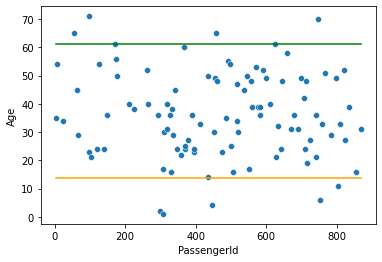

In [181]:
sns.scatterplot(x = data_pc['PassengerId'], y = data_pc['Age'])
sns.lineplot(x = data_pc['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = data_pc['PassengerId'], y = pu, color = 'green')

DROP VALUES

In [182]:
df_sd = data_pc[(data_pc['Age']>=pl) & (data_pc['Age']<=pu)]

In [183]:
df_sd[['Age']].describe()

,Age
count,91.000000
mean,36.450549
std,12.305612
min,14.000000
25%,26.000000
50%,36.000000
75%,48.000000
max,61.000000


In [193]:
data_pc['Age_drop'] = df_sd['Age']

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/1993396512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Age_drop'] = df_sd['Age']


CAP VALUES

In [195]:
data_pc['Age_pcv'] = np.where(
    data_pc['Age']<pl,
    pl,
    np.where(
        data_pc['Age']>pu,
        pu,
        data_pc['Age']
    )
)

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/1323596332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Age_pcv'] = np.where(


In [196]:
data_pc[['Age', 'Age_pcv', 'Age_drop']].describe()


,Age,Age_pcv,Age_drop
count,100.000000,100.000000,91.000000
mean,36.120000,36.302500,36.450549
std,15.121915,13.703558,12.305612
min,1.000000,13.850000,14.000000
25%,24.000000,24.000000,26.000000
50%,36.000000,36.000000,36.000000
75%,48.250000,48.250000,48.000000
max,71.000000,61.000000,61.000000


In [235]:
data_imputaciones['Age_pcv'] = data_pc['Age_pcv']
data_imputaciones['Age_drop'] = data_pc['Age_drop']

SibSp

In [197]:
data_pc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_pct,Age_drop,Age_pcv
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,35.0,35.0,35.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,54.0,54.0,54.0
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,34.0,34.0,34.0
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,61.0,NaN,61.0
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,45.0,45.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1.0,1.0,12749,93.50,B69,S,52.0,52.0,52.0
172,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0.0,1.0,392096,12.48,E121,S,27.0,27.0,27.0
173,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1.0,1.0,PC 17756,83.16,E49,C,39.0,39.0,39.0
174,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0.0,1.0,PC 17592,39.40,D28,S,16.0,16.0,16.0


In [203]:
pl = np.percentile(data_pc['SibSp'], 5)
pu = np.percentile(data_pc['SibSp'], 95)
print(pl,pu)

0.0 1.0


<AxesSubplot:xlabel='PassengerId', ylabel='SibSp'>

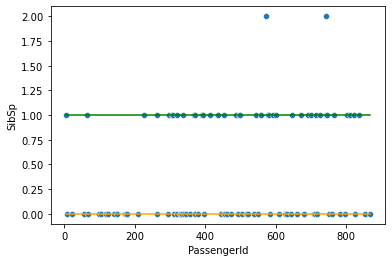

In [206]:
sns.scatterplot(x = data_pc['PassengerId'], y = data_pc['SibSp'])
sns.lineplot(x = data_pc['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = data_pc['PassengerId'], y = pu, color = 'green')

Cambiará, por muy poco y no será significante, pero es porque no contamos en Nan

Parch

In [209]:
pl = np.percentile(data_pc['Parch'], 5)
pu = np.percentile(data_pc['Parch'], 95)
print(pl,pu)

0.0 2.0


<AxesSubplot:xlabel='PassengerId', ylabel='Parch'>

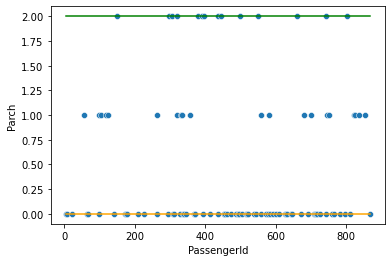

In [210]:
sns.scatterplot(x = data_pc['PassengerId'], y = data_pc['Parch'])
sns.lineplot(x = data_pc['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = data_pc['PassengerId'], y = pu, color = 'green')

Drop values

In [211]:
df_sd = data_pc[(data_pc['Parch']>=pl) & (data_pc['Parch']<=pu)]

In [212]:
df_sd[['Parch']].describe()

,Parch
count,100.000000
mean,0.480000
std,0.731402
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [214]:
data_pc['Parch_drop'] = df_sd['Parch']

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/2911064955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Parch_drop'] = df_sd['Parch']


Cap Values

In [215]:
data_pc['Parch_pcv'] = np.where(
    data_pc['Parch']<pl,
    pl,
    np.where(
        data_pc['Parch']>pu,
        pu,
        data_pc['Parch']
    )
)

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/3264061301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Parch_pcv'] = np.where(


In [216]:
data_pc[['Parch', 'Parch_pcv', 'Parch_drop']].describe()

,Parch,Parch_pcv,Parch_drop
count,100.000000,100.000000,100.000000
mean,0.480000,0.480000,0.480000
std,0.731402,0.731402,0.731402
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000


In [236]:
data_imputaciones['Parch_pcv'] = data_pc['Parch_pcv']
data_imputaciones['Parch_drop'] = data_pc['Parch_drop']

In [218]:
data_pc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_pct,Age_drop,Age_pcv,Parch_drop,Parch_pcv
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.10,C123,S,35.0,35.0,35.0,0.0,0.0
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.86,E46,S,54.0,54.0,54.0,0.0,0.0
5,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.00,D56,S,34.0,34.0,34.0,0.0,0.0
9,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0.0,1.0,113509,61.98,B30,C,61.0,65.0,61.0,1.0,1.0
10,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1.0,0.0,36973,83.48,C83,S,45.0,45.0,45.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1.0,1.0,12749,93.50,B69,S,52.0,52.0,52.0,1.0,1.0
172,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0.0,1.0,392096,12.48,E121,S,27.0,27.0,27.0,1.0,1.0
173,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1.0,1.0,PC 17756,83.16,E49,C,39.0,39.0,39.0,1.0,1.0
174,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0.0,1.0,PC 17592,39.40,D28,S,16.0,16.0,16.0,1.0,1.0


Fare

In [219]:
pl = np.percentile(data_pc['Fare'], 5)
pu = np.percentile(data_pc['Fare'], 95)
print(pl,pu)

12.48 154.0305


<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

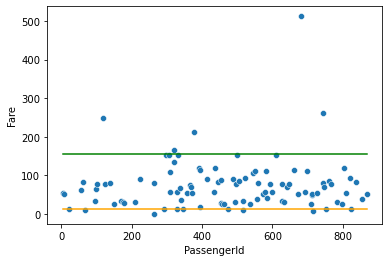

In [220]:
sns.scatterplot(x = data_pc['PassengerId'], y = data_pc['Fare'])
sns.lineplot(x = data_pc['PassengerId'], y = pl, color = 'orange')
sns.lineplot(x = data_pc['PassengerId'], y = pu, color = 'green')

Drop values

In [221]:
df_sd = data_pc[(data_pc['Fare']>=pl) & (data_pc['Fare']<=pu)]

In [222]:
df_sd[['Fare']].describe()

,Fare
count,91.000000
mean,66.124066
std,36.887319
min,12.480000
25%,33.760000
50%,57.980000
75%,86.500000
max,153.460000


In [223]:
data_pc['Fare_drop'] = df_sd['Fare']

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/3495820727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Fare_drop'] = df_sd['Fare']


Cap values

In [224]:
data_pc['Fare_pcv'] = np.where(
    data_pc['Fare']<pl,
    pl,
    np.where(
        data_pc['Fare']>pu,
        pu,
        data_pc['Fare']
    )
)

/var/folders/nc/msnr18q57_bfryvsdz5vb_w00000gn/T/ipykernel_54623/3708651722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pc['Fare_pcv'] = np.where(


In [225]:
data_pc[['Fare', 'Fare_pcv', 'Fare_drop']].describe()

,Fare,Fare_pcv,Fare_drop
count,100.000000,100.000000,91.000000
mean,74.445400,68.373625,66.124066
std,65.975312,41.694304,36.887319
min,0.000000,12.480000,12.480000
25%,31.990000,31.990000,33.760000
50%,59.980000,59.980000,57.980000
75%,90.000000,90.000000,86.500000
max,512.330000,154.030500,153.460000


In [238]:
data_imputaciones['Fare_pcv'] = data_pc['Fare_pcv']
data_imputaciones['Fare_drop'] = data_pc['Fare_drop']

# 5.	Al comparar los métodos del inciso 4 contra “titanic.csv”, ¿Qué método (para cada columna) se acerca más a la realidad y por qué?

In [226]:
data_limpia = pd.read_csv('titanic.csv')
data_limpia.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


COLUMNA AGE:

In [239]:
data_imputaciones.head()

,Sex_mode,Age_mean,Age_mode,Age_median,SibSp_mean,SibSp_mode,SibSp_median,Parch_mean,Parch_mode,Parch_median,...,age_lm,SibSp_lm,Parch_lm,Fare_lm,Age_pcv,Age_drop,Parch_pcv,Parch_drop,Fare_pcv,Fare_drop
0,male,38.00,38.0,38.0,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,35.00,35.0,35.0,1.0,1.0,1.0,0.0,0.0,0.0,...,39.0,1.0,0.0,73.27,35.0,35.0,0.0,0.0,53.10,53.10
2,male,54.00,54.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,0.0,0.0,46.76,54.0,54.0,0.0,0.0,51.86,51.86
3,female,35.69,24.0,35.5,1.0,1.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,female,58.00,58.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
data_limpia[['Age']].describe()

,Age
count,183.000000
mean,35.674426
std,15.643866
min,0.920000
25%,24.000000
50%,36.000000
75%,47.500000
max,80.000000


In [240]:
data_imputaciones[['Age_mean', 'Age_mode', 'Age_median', 'age_lm', 'Age_pcv', 'Age_drop']].describe()

,Age_mean,Age_mode,Age_median,age_lm,Age_pcv,Age_drop
count,183.000000,183.000000,183.000000,100.000000,100.000000,100.000000
mean,35.689891,34.092896,35.663934,36.130000,36.302500,36.120000
std,14.525802,15.073341,14.525949,8.267809,13.703558,15.121915
min,1.000000,1.000000,1.000000,11.000000,13.850000,1.000000
25%,25.000000,24.000000,25.000000,31.000000,24.000000,24.000000
50%,35.690000,31.000000,35.500000,38.000000,36.000000,36.000000
75%,46.500000,46.500000,46.500000,43.000000,48.250000,48.250000
max,80.000000,80.000000,80.000000,50.000000,61.000000,71.000000


Para este análisis, veremos punto por punto, con comentarios generales entre columnas y algunos a columnas en específico: 
- count: la cantidad de valores cambio con respecto a la data real, sólo con las columnas de la regresión lineal y el proceso de outliders de percentiles. Esto debido a que estos dós modelos necesitan trabajar con data completa y no pueden quedar con cantidad de datos distintos, en el lado de las variables para predecir la variable independiente.  
- mean: La media si representó un cambio en cada modelo. En el caso de la imputación por la media, fue el cambio más ligero, junto a la imputación por la mediana. Esto porque son valores muy parecidos, que puede que no cambien mucho la información de la data. En el caso de la moda, llega a sesgar la data y por ende, la media termina ciendo bastante alejada en comparación a la que se mantiene en realidad.  En el caso de la regresión lineal, conssidero que se pueden obtener buenos resultados en términos de la media, porque al contar con 83 datos menos, la media no se pasó por mucho. Para los percentiles, cuando eliminamos los valores que pasan los percentiles que creamos, vemos que puede mantener una buena similitud, esto en el caso de análisis más específicos. Al momento dehacer el cap, la media se mantiene cerca, puede que haya crecido porque pudo haber eliminado valores mínimos que afecten mucho la media, pero se mantiene valaores cercanos para hacer un análisis más específico. 
- Desviasión estándar: La desviasión si se perdió bastante en cualquier caso, sea imputación o una regresión o los outliders. En tema de las imputaciones, es porque modifícan el comportamiento de la data, puede que al ser  sólo por media, moda y mediana, la manera de mantener un poco el comportamientod de los datos no sea tan preciso. Por otro lado, las regresiones y outliders por perder datos, ssu desviación se ve afectada bastante.
- Minimos, máximo: En el caso de las imputaciones, no hay mucho cambio en estos valores, se da más en 50% y 75% de los datos, ya que obtiene nuevos valores que se repiten y modifican el comportamiento de los datos.  En el caso de la regresion y outliders, si cambian bastante porque cuentan con menos datos, algunos los dejamos al lado y los sustituye por un valor en específico. Tomar en cuenta que estos modelos eliminan toda fila que contenga un nan que involucre el modelo. 

Para la edad, el modelo que más se acerca al comportamiento de la data real parece ser: la imputación por la media, ya que no mueve mucho la desviasión estandar y mantiene la media bastante cercana a la realidad, contando con la misma cantidad de dato. 

COLUMNA SIBSP

In [247]:
data_limpia[['SibSp']].describe()

,SibSp
count,183.000000
mean,0.464481
std,0.644159
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [249]:
data_imputaciones[['SibSp_mean', 'SibSp_mode', 'SibSp_median', 'SibSp_lm']].describe()

,SibSp_mean,SibSp_mode,SibSp_median,SibSp_lm
count,183.000000,183.000000,183.000000,100.000000
mean,0.453552,0.453552,0.453552,0.460000
std,0.643459,0.643459,0.643459,0.500908
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,3.000000,1.000000


Para este análisis, veremos punto por punto, con comentarios generales entre columnas y algunos a columnas en específico: 
- count: En este caso, sólo la regresión lineal requirió la eliminación de nan, que llevo a que contase con menos valores. NO se hizo outliders, porque es probable que no modifique nada y no se pueda hacer un análisis más importante, no agrega valor. 
- mean: En este caso, todos los modelos mantienen la media de manera bastante parecida, por lo que los 4 modelos puedes ser una buena fuente de información que puede acercarse a la realidad. Eso se da, debido a los valores de la data, que cuenta con valores de 0 a 3, pero la mayoría es entre 0 y 1. 
- Desviasión estándar: La desviaciones estándar práctivamente no se mueven entre los modelos y en realición a la realidad son bastantes acertados, no parece que se sesge la data o que se modifique el comportamiento de la misma.
- Minimos, máximo: Cuenan con valores de 0 a 3 en todas imputaicones, execpto en la regresión lineal, debido a los nan, pero aún así mantiene los otros valores muy parecidos. 

En este caso, por la particularidad de la data, que parece ser que desde un principio los valores sosn muy repetitivos y no cuenta con valores atípicos que no muevan mucho los valores importantes, la imputación de cualquier tipo puede ser útil, se dejaría de último de esas imputaciones la moda, porque puede a largo plazo sesgar la data demasiado. La regresión, parece que demuestra el punto, cuenta con menos datos, con un min max distinto y aún así los datos estadísticos son bastante parecidos. 

COLUMNA PARCH